## Implementation of non-inferiority method in randomized clinical trial using $\text{SAS \& R}$ platforms.

### Collected by: Habib Ezzatabadi
### Teacher: Dr Bagheri
<br>
<hr><hr>
<br><br><br><br>

The Non-Inferiority method was discussed in detail in the class. I will take a brief look at four important methods in randomized clinical trials by bringing an image here, and then by bringing the codes used in $\text{SAS}$ and switching to $\text{SAS}$ software to implement the codes, and finally by defining a function in $\text{R}$. And using the data used in Sas similarly in $\text{R}$, we will see and discuss the results together.

In [2]:
library(magick)
library(cowplot)
library(tidyverse)

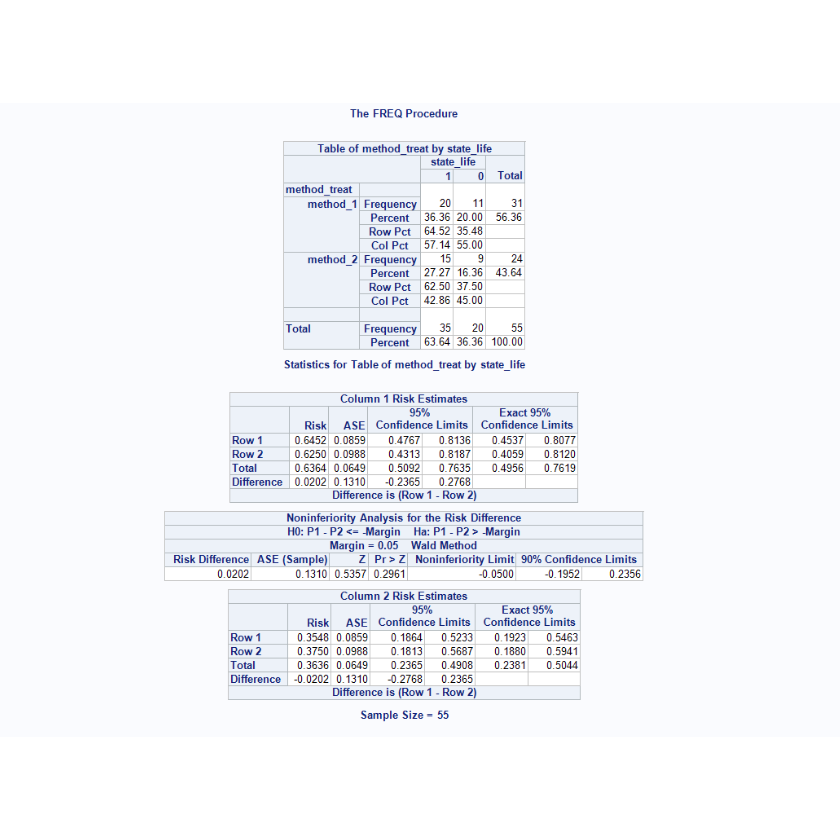

In [5]:
ggdraw() +
  draw_image(file.choose())

If we want to check how the difference between the standard treatment and the new treatment can be effective in determining the test statistic. Referring to Shao's book <a href="#f1"><bdi>[1]</bdi></a>, I give below the formula defined in this book to judge the difference between the two types of treatment.

#### <p style = "color : blue;"> For compare Means </p>
$$
\begin{align}
& \bar{x}_{i.} = \frac{1}{n_i}\sum_{j = 1}^{n_i} x_{ij}, \\
& s^2 = \frac{1}{n_1 + n_2 -2}\sum_{i = 1}^2 \sum_{j=1}^{n_i}(x_{ij} - \bar{x}_{i.})^2,\\
& \text{if}~ ~\epsilon = \bar{x}_1 - \bar{x}_2, \\
& \text{We want to test:}\quad \begin{cases} H_0: & \epsilon \leq \delta \\ H_1: &  \epsilon > \delta. \end{cases} \\
& T = \text{Test Statistics} = \frac{\bar{x_1} - \bar{x_2} - \delta}{s\sqrt{\frac{1}{n_1} + \frac{1}{n_2}}}, \\
 & \text{Critical region:  }~~ T > \mathcal{z}_{\alpha}, \\
 & \text{And Power of Test}: \quad \beta^* = 1-\beta = \Phi(T - \mathcal{z}_\alpha)
\end{align}
$$

#### <p style = "color : blue;"> For compare Proportions </p>

$$
\begin{align}
& \hat{p}_i = \frac{1}{n_i} \sum_{j = 1}^{n_i} x_{ij}, \\
& \text{We want to test:} \quad \begin{cases}H_0: & \epsilon \leq \delta \\
H_1: & \epsilon > \delta, \end{cases},\\
& \epsilon = \hat{p}_1 - \hat{p}_2,\\
& T = \text{Test Statistics} = \frac{\epsilon - \delta}{\sqrt{\frac{\hat{p}_1(1-\hat{p}_1)}{n_1} + \frac{\hat{p}_2 (1-\hat{p}_2)}{n_2}}} > \mathcal{z}_\alpha, \\
& \text{And Power of Test}: \quad  \beta^* = 1- \beta = \Phi(T - \mathcal{z}_\alpha).
\end{align}
$$

To implement this method in $\text{SAS}$, I have used a data that I bring the data below.

In [6]:
dat <- read_csv(file = file.choose(), col_names = TRUE, show_col_types = F)

ERROR: Error in file.choose(): file choice cancelled


In [ ]:
head(dat, 10)

standard,new
<dbl>,<dbl>
129,112
106,101
122,109
114,124
121,131
111,97
135,98
106,106
122,115


$$
\text{SAS Example 1 (Compare Means)}:
$$

In [ ]:
data bp;
input Treatment $;
do i=1 to 100;
  input bp @;
  output;
end;
datalines;
Standard 
129 106 122 114 121 111 135 106 122 148 102 121 129 101 109 123 109 123 101 119
138 151 137 116 118 118 143 104 119 113 121  98 116 103 132 113 105 127 113 118 
109  94 110 119 125 105 106 131 104 126 122 106 118 123 110 134 138 135 131 116 
117 123 103 111 120 137 106 112 100 112 128 102 116 118 140  97 122 133 129 127 
120 120 127 136 123 112  99 124 129 116 127 123 131 127 109  99 134 128 109 129
New
112 101 109 124 131  97  98 106 115 119 116 125 108 116 111 121 109 124 120  96 
102 130 106 112 115 111 122 106 107 109 115 104 125 114 135 127 117 113  98  95 
121 116 111 116 118 112 117 114 128 125 104 118 122 123 124 119 110  96 123 124 
127 100 121 108 133 118 114 116 125 118 137 115 131 108 100 121 113 116 104 101 
126 123 135 116 118 111 101 118 111 125 104 124 132 121 114 132 123 121 121 110
;
ods graphics on;
proc ttest 
data=bp 
h0=-5 
plots(only shownull)=interval 
sides=U;
class Treatment;
var BP;
run;

$$
\text{Results}:
$$

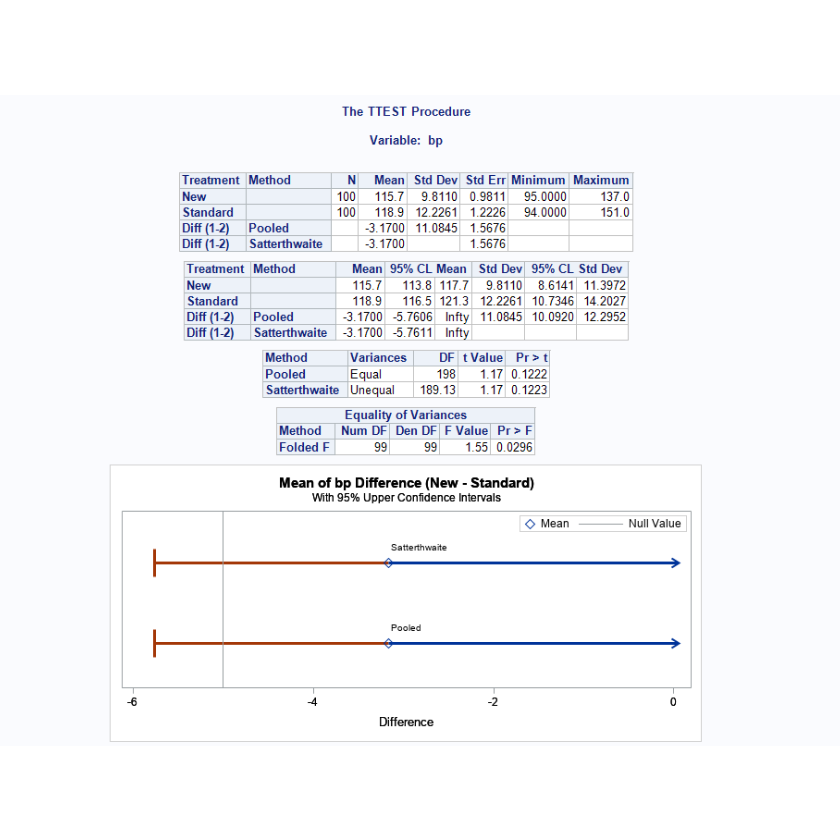

In [ ]:
ggdraw() +
  draw_image(file.choose())

$$
\text{SAS Example 2 (For Compate Means) }:
$$

In [ ]:
PROC SQL;
	CREATE VIEW WORK.TMP0TempTableInput AS
		SELECT T.treat, T.values
	FROM WORK.DATA2 as T
;
TITLE;
TITLE1 "t Test";
QUIT;
ods graphics on;
PROC TTEST 
	DATA = WORK.TMP0TempTableInput
	PLOTS(ONLY SHOWNULL)=INTERVAL 
    SIDES=U
	ALPHA=0.05
	H0 =-2
	CI = EQUAL;
	CLASS treat;
	VAR values;
RUN;

$$
\text{Result}:
$$

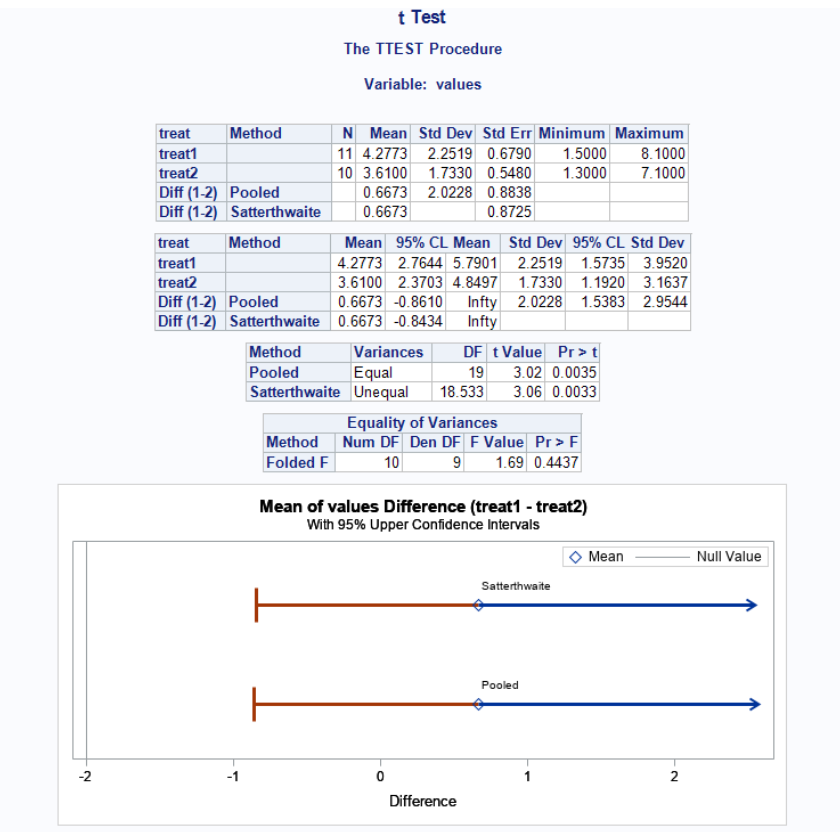

In [ ]:
ggdraw() +
  draw_image(file.choose())

$$
\text{SAS Example 3 (For Compate Means) }:
$$

In [ ]:
PROC SQL;
	CREATE VIEW WORK.TMP0TempTableInput AS
		SELECT T.treat, T.values
	FROM WORK.DATA3 as T
;
QUIT;
TITLE;
TITLE1 "t Test";
ods graphics on;
PROC TTEST 
	DATA = WORK.TMP0TempTableInput 
	ALPHA=0.05
	H0 = 3
	SIDES = L
	PLOTS(ONLY SHOWNULL)=INTERVAL 
	CI = EQUAL;
	 
	CLASS treat;
	VAR values;
RUN;

$$
\text{Results}:
$$

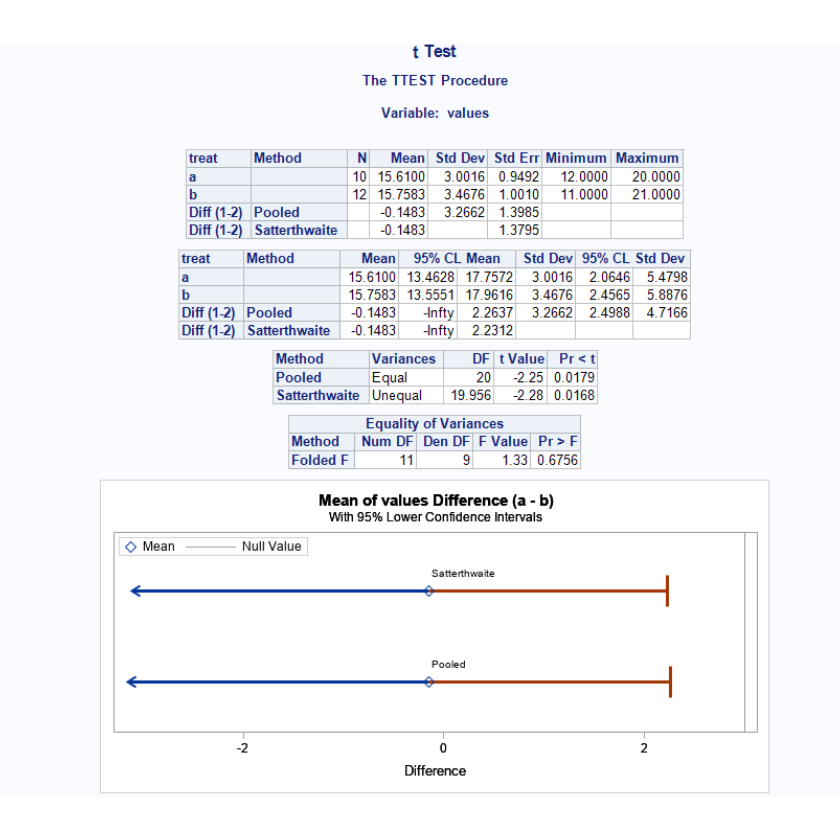

In [ ]:
ggdraw() +
  draw_image(file.choose())

$$
\text{SAS Example 4 (For Compare Proportions)}
$$

In [ ]:
data results;
         input Group $ Response Count;
         datalines;
      Chemo 1 53
      Chemo 0 4
      Radio 1 51
      Radio 0 6
      ;
proc freq data=results order=data;
      tables group*response / riskdiff(noninf margin=0.1 method=fm);
      weight count;
      run;

$$
\text{Results}:
$$

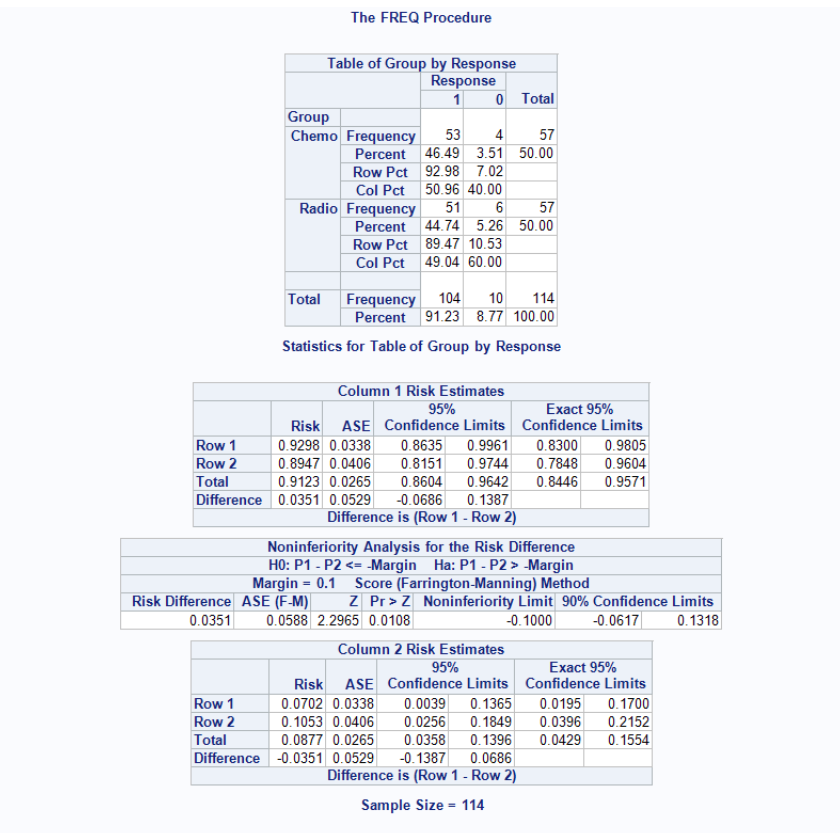

In [ ]:
ggdraw() +
  draw_image(file.choose())

$$
\text{SAS Example 5 (For Compare Proportions)}
$$

In [ ]:
PROC SQL;
	CREATE VIEW WORK.TMP0TempTableInput AS
		SELECT T.drug, T.alive, T.count
	FROM WORK.data_prop_2 as T
;
QUIT;
proc freq data= WORK.data_prop_2 order=data;
      tables drug*alive / riskdiff(noninf margin=0.1 method=wald);
      weight count;
      run;


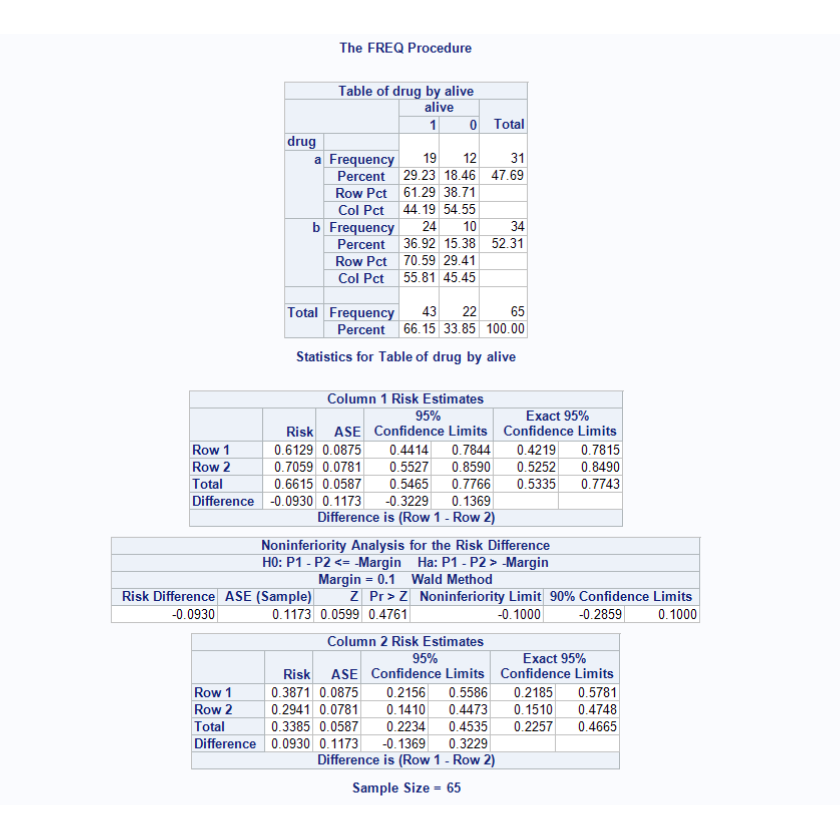

In [ ]:
ggdraw() +
  draw_image(file.choose())

In [ ]:
PROC SQL;
	CREATE VIEW WORK.TMP0TempTableInput AS
		SELECT T.method_treat, T.state_life, T.count
	FROM WORK.data_prop_3 as T
;
QUIT;
proc freq data= WORK.data_prop_3 order=data;
      tables method_treat*state_life / riskdiff(noninf margin=0.05 method=wald);
      weight count;
      run;

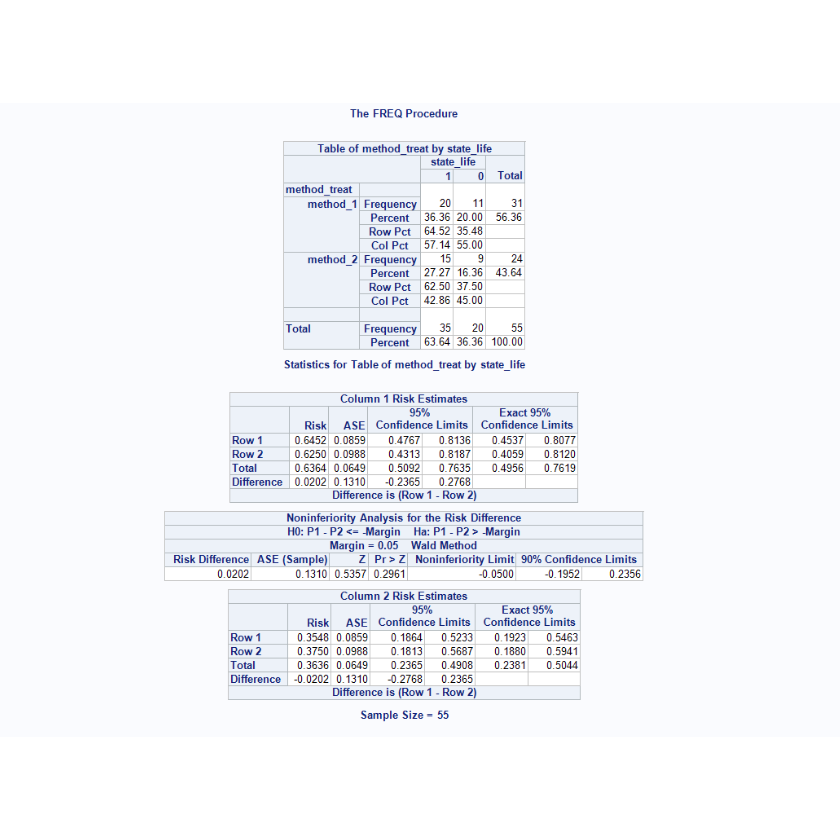

In [7]:
ggdraw() +
  draw_image(file.choose())

<br><br>
<hr><hr>
<br><br>

$$
\text{R codes}:
$$

<br><br>

$$
\text{R: Example I}
$$

In [11]:
#library(devtools)
#install_github("stats9/contigencyTable2", subdir = "contigencyTable2")

In [3]:
library(contigencyTable2)

In [13]:
data(package = "contigencyTable2")

Data sets in package 'contigencyTable2':

HyperTension            HyperTension Data
rct_binary_data_1       rct_binary_data_1 Data
rct_binary_data_2       rct_binary_data_2 Data
rct_binary_data_3       rct_binary_data_3 Data
rct_continuous_data_2   rct_continuous_data_2 Data
rct_continuous_data_3   rct_continuous_data_3 Data
table_1                 table_1 contigency table with 3 variables
table_2                 table_2 contigency table with 2 variables

In [14]:
head(HyperTension)

,value,Groups
,<dbl>,<fct>
1,129,standard
2,106,standard
3,122,standard
4,114,standard
5,121,standard
6,111,standard


In [19]:
Inferiority_superiority_test_pa(dataType = "continuous", Dat = HyperTension, 
alpha = 0.05, margin = 5, reff = 2) -> Ress

In [20]:
Ress$TtestResult


	Non-Inferiority Test: According T test for Mean Difference

data:  group 1: standard, group 2: new
T-statistic = 1.1674, new = 115.74, standard = 118.91, df = 189.13,
p-value = 0.122
alternative hypothesis: true Mean Difference: new - standard is greater than -5
95 percent confidence interval:
 -5.761137       Inf
sample estimates:
Mean Difference: (new - standard) 
                            -3.17 


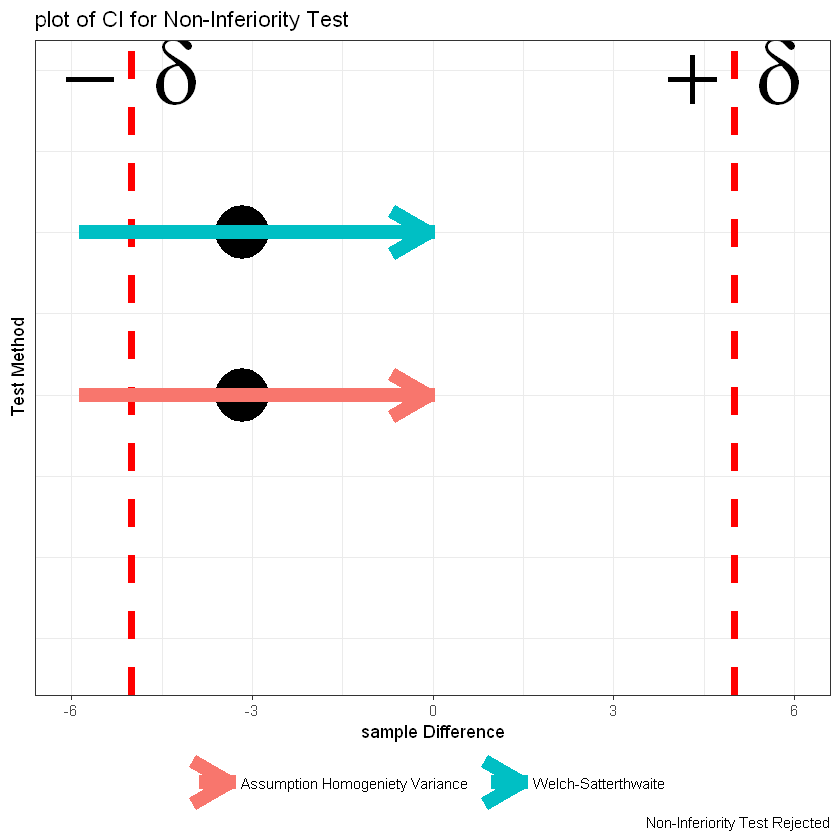

In [21]:
Ress$TestPlot

In [23]:
#Ress$Test_Table

<table class=" lightable-paper lightable-hover" style='font-family: "Arial Narrow", arial, helvetica, sans-serif; width: auto !important; margin-left: auto; margin-right: auto;border-bottom: 0;'>
<caption>Table of Non-Inferiority Test Results</caption>
 <thead>
  <tr>
   <th style="text-align:left;font-weight: bold;font-style: italic;color: white !important;background-color: green !important;"> Test_method </th>
   <th style="text-align:left;font-weight: bold;font-style: italic;color: white !important;background-color: green !important;"> new - standard </th>
   <th style="text-align:left;font-weight: bold;font-style: italic;color: white !important;background-color: green !important;"> new </th>
   <th style="text-align:left;font-weight: bold;font-style: italic;color: white !important;background-color: green !important;"> standard </th>
   <th style="text-align:left;font-weight: bold;font-style: italic;color: white !important;background-color: green !important;"> n1 </th>
   <th style="text-align:left;font-weight: bold;font-style: italic;color: white !important;background-color: green !important;"> n2 </th>
   <th style="text-align:left;font-weight: bold;font-style: italic;color: white !important;background-color: green !important;"> t_statistic </th>
   <th style="text-align:left;font-weight: bold;font-style: italic;color: white !important;background-color: green !important;"> p-value </th>
   <th style="text-align:left;font-weight: bold;font-style: italic;color: white !important;background-color: green !important;"> df </th>
   <th style="text-align:left;font-weight: bold;font-style: italic;color: white !important;background-color: green !important;"> CI_Lower_bond </th>
   <th style="text-align:left;font-weight: bold;font-style: italic;color: white !important;background-color: green !important;"> CI_Upper_bond </th>
   <th style="text-align:left;font-weight: bold;font-style: italic;color: white !important;background-color: green !important;"> Margin </th>
  </tr>
 </thead>
<tbody>
  <tr>
   <td style="text-align:left;font-weight: bold;color: black !important;background-color: white !important;"> Assumption Equal variance </td>
   <td style="text-align:left;font-weight: bold;color: black !important;background-color: white !important;"> -3.17 </td>
   <td style="text-align:left;font-weight: bold;color: black !important;background-color: white !important;"> 115.74 </td>
   <td style="text-align:left;font-weight: bold;color: black !important;background-color: white !important;"> 118.91 </td>
   <td style="text-align:left;font-weight: bold;color: black !important;background-color: white !important;"> 100 </td>
   <td style="text-align:left;font-weight: bold;color: black !important;background-color: white !important;"> 100 </td>
   <td style="text-align:left;font-weight: bold;color: black !important;background-color: white !important;"> 1.1674 </td>
   <td style="text-align:left;font-weight: bold;color: black !important;background-color: white !important;"> 0.122 </td>
   <td style="text-align:left;font-weight: bold;color: black !important;background-color: white !important;"> 198 </td>
   <td style="text-align:left;font-weight: bold;color: black !important;background-color: white !important;"> -5.7606 </td>
   <td style="text-align:left;font-weight: bold;color: black !important;background-color: white !important;"> Inf </td>
   <td style="text-align:left;font-weight: bold;color: black !important;background-color: white !important;"> -5 </td>
  </tr>
  <tr>
   <td style="text-align:left;font-weight: bold;color: white !important;background-color: red !important;"> Welch-Satterthwaite </td>
   <td style="text-align:left;font-weight: bold;color: white !important;background-color: red !important;"> -3.17 </td>
   <td style="text-align:left;font-weight: bold;color: white !important;background-color: red !important;"> 115.74 </td>
   <td style="text-align:left;font-weight: bold;color: white !important;background-color: red !important;"> 118.91 </td>
   <td style="text-align:left;font-weight: bold;color: white !important;background-color: red !important;"> 100 </td>
   <td style="text-align:left;font-weight: bold;color: white !important;background-color: red !important;"> 100 </td>
   <td style="text-align:left;font-weight: bold;color: white !important;background-color: red !important;"> 1.1674 </td>
   <td style="text-align:left;font-weight: bold;color: white !important;background-color: red !important;"> 0.122 </td>
   <td style="text-align:left;font-weight: bold;color: white !important;background-color: red !important;"> 189.1282 </td>
   <td style="text-align:left;font-weight: bold;color: white !important;background-color: red !important;"> -5.7611 </td>
   <td style="text-align:left;font-weight: bold;color: white !important;background-color: red !important;"> Inf </td>
   <td style="text-align:left;font-weight: bold;color: white !important;background-color: red !important;"> -5 </td>
  </tr>
  <tr grouplength="2"><td colspan="12" style="border-top: 3px solid;color: #d48a00 !important;"><em><strong>Test of Homogeneity of Variance, level of test = 0.05</strong></em></td></tr>
<tr>
   <td style="text-align:left;padding-left: 2em;font-weight: bold;font-style: italic;color: white !important;background-color: green !important;" indentlevel="1"> F Test for equal variance </td>
   <td style="text-align:left;font-weight: bold;font-style: italic;color: white !important;background-color: green !important;"> F-value </td>
   <td style="text-align:left;font-weight: bold;font-style: italic;color: white !important;background-color: green !important;"> p-value </td>
   <td style="text-align:left;font-weight: bold;font-style: italic;color: white !important;background-color: green !important;">  </td>
   <td style="text-align:left;font-weight: bold;font-style: italic;color: white !important;background-color: green !important;">  </td>
   <td style="text-align:left;font-weight: bold;font-style: italic;color: white !important;background-color: green !important;">  </td>
   <td style="text-align:left;font-weight: bold;font-style: italic;color: white !important;background-color: green !important;">  </td>
   <td style="text-align:left;font-weight: bold;font-style: italic;color: white !important;background-color: green !important;">  </td>
   <td style="text-align:left;font-weight: bold;font-style: italic;color: white !important;background-color: green !important;">  </td>
   <td style="text-align:left;font-weight: bold;font-style: italic;color: white !important;background-color: green !important;">  </td>
   <td style="text-align:left;font-weight: bold;font-style: italic;color: white !important;background-color: green !important;">  </td>
   <td style="text-align:left;font-weight: bold;font-style: italic;color: white !important;background-color: green !important;">  </td>
  </tr>
  <tr>
   <td style="text-align:left;padding-left: 2em;font-weight: bold;color: white !important;background-color: red !important;" indentlevel="1">  </td>
   <td style="text-align:left;font-weight: bold;color: white !important;background-color: red !important;"> 1.5529 </td>
   <td style="text-align:left;font-weight: bold;color: white !important;background-color: red !important;"> 0.0296 </td>
   <td style="text-align:left;font-weight: bold;color: white !important;background-color: red !important;">  </td>
   <td style="text-align:left;font-weight: bold;color: white !important;background-color: red !important;">  </td>
   <td style="text-align:left;font-weight: bold;color: white !important;background-color: red !important;">  </td>
   <td style="text-align:left;font-weight: bold;color: white !important;background-color: red !important;">  </td>
   <td style="text-align:left;font-weight: bold;color: white !important;background-color: red !important;">  </td>
   <td style="text-align:left;font-weight: bold;color: white !important;background-color: red !important;">  </td>
   <td style="text-align:left;font-weight: bold;color: white !important;background-color: red !important;">  </td>
   <td style="text-align:left;font-weight: bold;color: white !important;background-color: red !important;">  </td>
   <td style="text-align:left;font-weight: bold;color: white !important;background-color: red !important;">  </td>
  </tr>
</tbody>
<tfoot>
<tr><td style="padding: 0; " colspan="100%"><span style="font-style: italic;">Note: </span></td></tr>
<tr><td style="padding: 0; " colspan="100%">
<sup></sup> Test for Homogeniety of Variance; H0 is Rejected. therefore, we have to look at the Welch-Satterthwaite test results</td></tr>
<tr><td style="padding: 0; " colspan="100%">
<sup>1</sup> Assumption Equal Variance: based on p-value = 0.1220, therefore Non-Inferiority Test Rejected, alpha = 0.050</td></tr>
<tr><td style="padding: 0; " colspan="100%">
<sup>2</sup> Welch-Satterthwaite: based on p-value = 0.1220, therefore Non-Inferiority Test Rejected, alpha = 0.050</td></tr>
<tr><td style="padding: 0; " colspan="100%">
<sup>3</sup> Confidence Interval is 95.0 %</td></tr>
</tfoot>
</table>

<br><br><br>

$$
\text{R: Example II}
$$

In [24]:
head(rct_continuous_data_2)

,values,treat
,<dbl>,<chr>
1,1.5,treat1
2,2.2,treat2
3,3.1,treat1
4,4.1,treat1
5,5.2,treat1
6,3.2,treat2


In [25]:
Ress <- Inferiority_superiority_test_pa(dataType = "continuous", Dat = rct_continuous_data_2, alpha = 0.05, margin = 2, Name_groups = c("treat1", "treat2"))

In [27]:
Ress$TtestResult


	Non-Inferiority Test: According T test for Mean Difference

data:  group 1: treat1, group 2: treat2
T-statistic = 3.0179, treat1 = 4.2773, treat2 = 3.6100, df = 19.0000,
p-value = 0.0035
alternative hypothesis: true Mean Difference: treat1 - treat2 is greater than -2
95 percent confidence interval:
 -0.8609577        Inf
sample estimates:
Mean Difference: (treat1 - treat2) 
                         0.6672727 


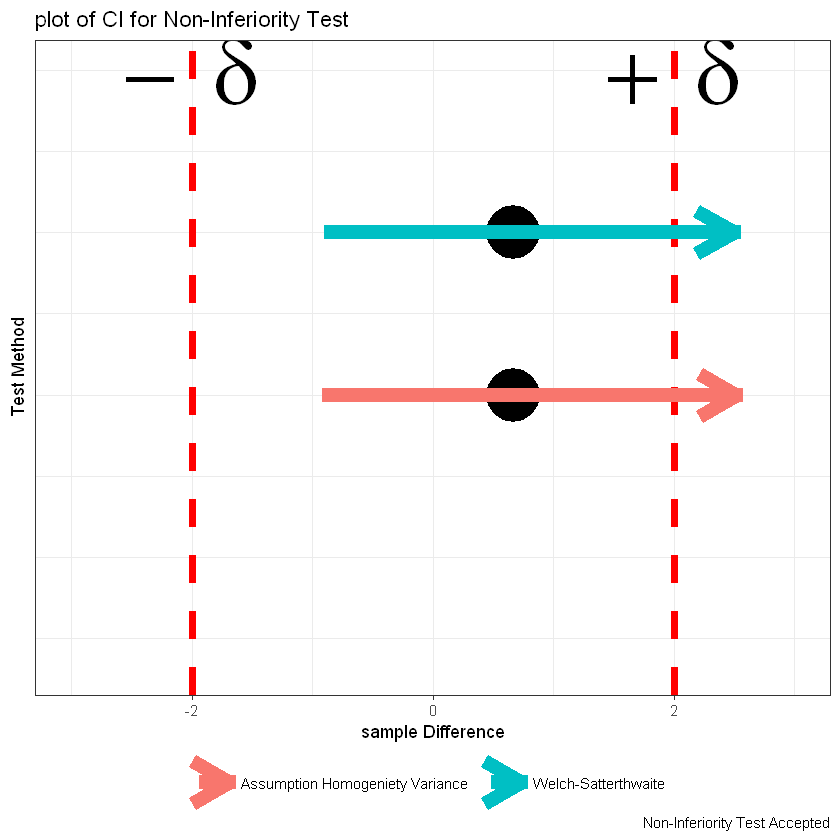

In [28]:
Ress$TestPlot

In [30]:
#Ress$Test_Table

<table class=" lightable-paper lightable-hover" style='font-family: "Arial Narrow", arial, helvetica, sans-serif; width: auto !important; margin-left: auto; margin-right: auto;border-bottom: 0;'>
<caption>Table of Non-Inferiority Test Results</caption>
 <thead>
  <tr>
   <th style="text-align:left;font-weight: bold;font-style: italic;color: white !important;background-color: green !important;"> Test_method </th>
   <th style="text-align:left;font-weight: bold;font-style: italic;color: white !important;background-color: green !important;"> treat1 - treat2 </th>
   <th style="text-align:left;font-weight: bold;font-style: italic;color: white !important;background-color: green !important;"> treat1 </th>
   <th style="text-align:left;font-weight: bold;font-style: italic;color: white !important;background-color: green !important;"> treat2 </th>
   <th style="text-align:left;font-weight: bold;font-style: italic;color: white !important;background-color: green !important;"> n1 </th>
   <th style="text-align:left;font-weight: bold;font-style: italic;color: white !important;background-color: green !important;"> n2 </th>
   <th style="text-align:left;font-weight: bold;font-style: italic;color: white !important;background-color: green !important;"> t_statistic </th>
   <th style="text-align:left;font-weight: bold;font-style: italic;color: white !important;background-color: green !important;"> p-value </th>
   <th style="text-align:left;font-weight: bold;font-style: italic;color: white !important;background-color: green !important;"> df </th>
   <th style="text-align:left;font-weight: bold;font-style: italic;color: white !important;background-color: green !important;"> CI_Lower_bond </th>
   <th style="text-align:left;font-weight: bold;font-style: italic;color: white !important;background-color: green !important;"> CI_Upper_bond </th>
   <th style="text-align:left;font-weight: bold;font-style: italic;color: white !important;background-color: green !important;"> Margin </th>
  </tr>
 </thead>
<tbody>
  <tr>
   <td style="text-align:left;font-weight: bold;color: black !important;background-color: white !important;"> Assumption Equal variance </td>
   <td style="text-align:left;font-weight: bold;color: black !important;background-color: white !important;"> 0.6673 </td>
   <td style="text-align:left;font-weight: bold;color: black !important;background-color: white !important;"> 4.2773 </td>
   <td style="text-align:left;font-weight: bold;color: black !important;background-color: white !important;"> 3.61 </td>
   <td style="text-align:left;font-weight: bold;color: black !important;background-color: white !important;"> 11 </td>
   <td style="text-align:left;font-weight: bold;color: black !important;background-color: white !important;"> 10 </td>
   <td style="text-align:left;font-weight: bold;color: black !important;background-color: white !important;"> 3.0179 </td>
   <td style="text-align:left;font-weight: bold;color: black !important;background-color: white !important;"> 0.0035 </td>
   <td style="text-align:left;font-weight: bold;color: black !important;background-color: white !important;"> 19 </td>
   <td style="text-align:left;font-weight: bold;color: black !important;background-color: white !important;"> -0.861 </td>
   <td style="text-align:left;font-weight: bold;color: black !important;background-color: white !important;"> Inf </td>
   <td style="text-align:left;font-weight: bold;color: black !important;background-color: white !important;"> -2 </td>
  </tr>
  <tr>
   <td style="text-align:left;font-weight: bold;color: black !important;background-color: white !important;"> Welch-Satterthwaite </td>
   <td style="text-align:left;font-weight: bold;color: black !important;background-color: white !important;"> 0.6673 </td>
   <td style="text-align:left;font-weight: bold;color: black !important;background-color: white !important;"> 4.2773 </td>
   <td style="text-align:left;font-weight: bold;color: black !important;background-color: white !important;"> 3.61 </td>
   <td style="text-align:left;font-weight: bold;color: black !important;background-color: white !important;"> 11 </td>
   <td style="text-align:left;font-weight: bold;color: black !important;background-color: white !important;"> 10 </td>
   <td style="text-align:left;font-weight: bold;color: black !important;background-color: white !important;"> 3.0569 </td>
   <td style="text-align:left;font-weight: bold;color: black !important;background-color: white !important;"> 0.0033 </td>
   <td style="text-align:left;font-weight: bold;color: black !important;background-color: white !important;"> 18.5335 </td>
   <td style="text-align:left;font-weight: bold;color: black !important;background-color: white !important;"> -0.8434 </td>
   <td style="text-align:left;font-weight: bold;color: black !important;background-color: white !important;"> Inf </td>
   <td style="text-align:left;font-weight: bold;color: black !important;background-color: white !important;"> -2 </td>
  </tr>
  <tr grouplength="2"><td colspan="12" style="border-top: 3px solid;color: #d48a00 !important;"><em><strong>Test of Homogeneity of Variance, level of test = 0.05</strong></em></td></tr>
<tr>
   <td style="text-align:left;padding-left: 2em;font-weight: bold;font-style: italic;color: white !important;background-color: green !important;" indentlevel="1"> F Test for equal variance </td>
   <td style="text-align:left;font-weight: bold;font-style: italic;color: white !important;background-color: green !important;"> F-value </td>
   <td style="text-align:left;font-weight: bold;font-style: italic;color: white !important;background-color: green !important;"> p-value </td>
   <td style="text-align:left;font-weight: bold;font-style: italic;color: white !important;background-color: green !important;">  </td>
   <td style="text-align:left;font-weight: bold;font-style: italic;color: white !important;background-color: green !important;">  </td>
   <td style="text-align:left;font-weight: bold;font-style: italic;color: white !important;background-color: green !important;">  </td>
   <td style="text-align:left;font-weight: bold;font-style: italic;color: white !important;background-color: green !important;">  </td>
   <td style="text-align:left;font-weight: bold;font-style: italic;color: white !important;background-color: green !important;">  </td>
   <td style="text-align:left;font-weight: bold;font-style: italic;color: white !important;background-color: green !important;">  </td>
   <td style="text-align:left;font-weight: bold;font-style: italic;color: white !important;background-color: green !important;">  </td>
   <td style="text-align:left;font-weight: bold;font-style: italic;color: white !important;background-color: green !important;">  </td>
   <td style="text-align:left;font-weight: bold;font-style: italic;color: white !important;background-color: green !important;">  </td>
  </tr>
  <tr>
   <td style="text-align:left;padding-left: 2em;font-weight: bold;color: black !important;background-color: rgba(190, 190, 190, 0.69) !important;" indentlevel="1">  </td>
   <td style="text-align:left;font-weight: bold;color: black !important;background-color: rgba(190, 190, 190, 0.69) !important;"> 1.6886 </td>
   <td style="text-align:left;font-weight: bold;color: black !important;background-color: rgba(190, 190, 190, 0.69) !important;"> 0.4437 </td>
   <td style="text-align:left;font-weight: bold;color: black !important;background-color: rgba(190, 190, 190, 0.69) !important;">  </td>
   <td style="text-align:left;font-weight: bold;color: black !important;background-color: rgba(190, 190, 190, 0.69) !important;">  </td>
   <td style="text-align:left;font-weight: bold;color: black !important;background-color: rgba(190, 190, 190, 0.69) !important;">  </td>
   <td style="text-align:left;font-weight: bold;color: black !important;background-color: rgba(190, 190, 190, 0.69) !important;">  </td>
   <td style="text-align:left;font-weight: bold;color: black !important;background-color: rgba(190, 190, 190, 0.69) !important;">  </td>
   <td style="text-align:left;font-weight: bold;color: black !important;background-color: rgba(190, 190, 190, 0.69) !important;">  </td>
   <td style="text-align:left;font-weight: bold;color: black !important;background-color: rgba(190, 190, 190, 0.69) !important;">  </td>
   <td style="text-align:left;font-weight: bold;color: black !important;background-color: rgba(190, 190, 190, 0.69) !important;">  </td>
   <td style="text-align:left;font-weight: bold;color: black !important;background-color: rgba(190, 190, 190, 0.69) !important;">  </td>
  </tr>
</tbody>
<tfoot>
<tr><td style="padding: 0; " colspan="100%"><span style="font-style: italic;">Note: </span></td></tr>
<tr><td style="padding: 0; " colspan="100%">
<sup></sup> Test for Homogeniety of Variance; H0 is Accepted. therefore, we have to look at the Assumption Equal Variance test results</td></tr>
<tr><td style="padding: 0; " colspan="100%">
<sup>1</sup> Assumption Equal Variance: based on p-value = 0.0035, therefore Non-Inferiority Test Accepted, alpha = 0.050</td></tr>
<tr><td style="padding: 0; " colspan="100%">
<sup>2</sup> Welch-Satterthwaite: based on p-value = 0.0033, therefore Non-Inferiority Test Accepted, alpha = 0.050</td></tr>
<tr><td style="padding: 0; " colspan="100%">
<sup>3</sup> Confidence Interval is 95.0 %</td></tr>
</tfoot>
</table>

<br><br>
$$
\text{R: Example III}
$$

In [4]:
rct_continuous_data_3 %>% head(10)

,treat,values
,<chr>,<dbl>
1,a,12.0
2,a,12.0
3,a,13.0
4,a,14.0
5,b,14.5
6,b,12.1
7,b,12.3
8,b,15.0
9,a,17.0


In [5]:
Inferiority_superiority_test_pa(dataType = "continuous", Dat = rct_continuous_data_3[, 2:1], 
margin = 3, better = "left", Name_groups = c("a", "b")) -> Ress

In [7]:
attributes(Ress)
Ress$TtestResult

$names
[1] "TtestResult"     "HomogeneityTest" "TestPlot"        "Test_Table"


	Non-Inferiority Test: According T test for Mean Difference

data:  group 1: a, group 2: b
T-statistic = -2.2512, a = 15.610, b = 15.758, df = 20.000, p-value =
0.0179
alternative hypothesis: true Mean Difference: a - b is less than 3
95 percent confidence interval:
     -Inf 2.263673
sample estimates:
Mean Difference: (a - b) 
              -0.1483333 


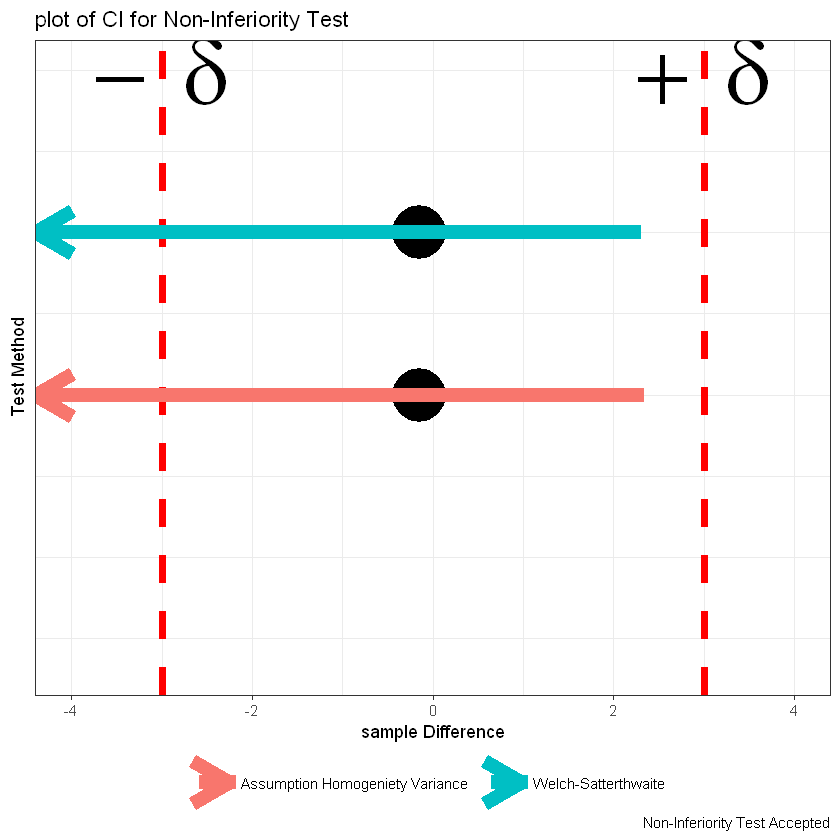

In [8]:
Ress$TestPlot

In [11]:
#Ress$Test_Table

<table class=" lightable-paper lightable-hover" style='font-family: "Arial Narrow", arial, helvetica, sans-serif; width: auto !important; margin-left: auto; margin-right: auto;border-bottom: 0;'>
<caption>Table of Non-Inferiority Test Results</caption>
 <thead>
  <tr>
   <th style="text-align:left;font-weight: bold;font-style: italic;color: white !important;background-color: green !important;"> Test_method </th>
   <th style="text-align:left;font-weight: bold;font-style: italic;color: white !important;background-color: green !important;"> a - b </th>
   <th style="text-align:left;font-weight: bold;font-style: italic;color: white !important;background-color: green !important;"> a </th>
   <th style="text-align:left;font-weight: bold;font-style: italic;color: white !important;background-color: green !important;"> b </th>
   <th style="text-align:left;font-weight: bold;font-style: italic;color: white !important;background-color: green !important;"> n1 </th>
   <th style="text-align:left;font-weight: bold;font-style: italic;color: white !important;background-color: green !important;"> n2 </th>
   <th style="text-align:left;font-weight: bold;font-style: italic;color: white !important;background-color: green !important;"> t_statistic </th>
   <th style="text-align:left;font-weight: bold;font-style: italic;color: white !important;background-color: green !important;"> p-value </th>
   <th style="text-align:left;font-weight: bold;font-style: italic;color: white !important;background-color: green !important;"> df </th>
   <th style="text-align:left;font-weight: bold;font-style: italic;color: white !important;background-color: green !important;"> CI_Lower_bond </th>
   <th style="text-align:left;font-weight: bold;font-style: italic;color: white !important;background-color: green !important;"> CI_Upper_bond </th>
   <th style="text-align:left;font-weight: bold;font-style: italic;color: white !important;background-color: green !important;"> Margin </th>
  </tr>
 </thead>
<tbody>
  <tr>
   <td style="text-align:left;font-weight: bold;color: black !important;background-color: white !important;"> Assumption Equal variance </td>
   <td style="text-align:left;font-weight: bold;color: black !important;background-color: white !important;"> -0.1483 </td>
   <td style="text-align:left;font-weight: bold;color: black !important;background-color: white !important;"> 15.61 </td>
   <td style="text-align:left;font-weight: bold;color: black !important;background-color: white !important;"> 15.7583 </td>
   <td style="text-align:left;font-weight: bold;color: black !important;background-color: white !important;"> 10 </td>
   <td style="text-align:left;font-weight: bold;color: black !important;background-color: white !important;"> 12 </td>
   <td style="text-align:left;font-weight: bold;color: black !important;background-color: white !important;"> -2.2512 </td>
   <td style="text-align:left;font-weight: bold;color: black !important;background-color: white !important;"> 0.0179 </td>
   <td style="text-align:left;font-weight: bold;color: black !important;background-color: white !important;"> 20 </td>
   <td style="text-align:left;font-weight: bold;color: black !important;background-color: white !important;"> -Inf </td>
   <td style="text-align:left;font-weight: bold;color: black !important;background-color: white !important;"> 2.2637 </td>
   <td style="text-align:left;font-weight: bold;color: black !important;background-color: white !important;"> 3 </td>
  </tr>
  <tr>
   <td style="text-align:left;font-weight: bold;color: black !important;background-color: white !important;"> Welch-Satterthwaite </td>
   <td style="text-align:left;font-weight: bold;color: black !important;background-color: white !important;"> -0.1483 </td>
   <td style="text-align:left;font-weight: bold;color: black !important;background-color: white !important;"> 15.61 </td>
   <td style="text-align:left;font-weight: bold;color: black !important;background-color: white !important;"> 15.7583 </td>
   <td style="text-align:left;font-weight: bold;color: black !important;background-color: white !important;"> 10 </td>
   <td style="text-align:left;font-weight: bold;color: black !important;background-color: white !important;"> 12 </td>
   <td style="text-align:left;font-weight: bold;color: black !important;background-color: white !important;"> -2.2822 </td>
   <td style="text-align:left;font-weight: bold;color: black !important;background-color: white !important;"> 0.0168 </td>
   <td style="text-align:left;font-weight: bold;color: black !important;background-color: white !important;"> 19.9557 </td>
   <td style="text-align:left;font-weight: bold;color: black !important;background-color: white !important;"> -Inf </td>
   <td style="text-align:left;font-weight: bold;color: black !important;background-color: white !important;"> 2.2312 </td>
   <td style="text-align:left;font-weight: bold;color: black !important;background-color: white !important;"> 3 </td>
  </tr>
  <tr grouplength="2"><td colspan="12" style="border-top: 3px solid;color: #d48a00 !important;"><em><strong>Test of Homogeneity of Variance, level of test = 0.05</strong></em></td></tr>
<tr>
   <td style="text-align:left;padding-left: 2em;font-weight: bold;font-style: italic;color: white !important;background-color: green !important;" indentlevel="1"> F Test for equal variance </td>
   <td style="text-align:left;font-weight: bold;font-style: italic;color: white !important;background-color: green !important;"> F-value </td>
   <td style="text-align:left;font-weight: bold;font-style: italic;color: white !important;background-color: green !important;"> p-value </td>
   <td style="text-align:left;font-weight: bold;font-style: italic;color: white !important;background-color: green !important;">  </td>
   <td style="text-align:left;font-weight: bold;font-style: italic;color: white !important;background-color: green !important;">  </td>
   <td style="text-align:left;font-weight: bold;font-style: italic;color: white !important;background-color: green !important;">  </td>
   <td style="text-align:left;font-weight: bold;font-style: italic;color: white !important;background-color: green !important;">  </td>
   <td style="text-align:left;font-weight: bold;font-style: italic;color: white !important;background-color: green !important;">  </td>
   <td style="text-align:left;font-weight: bold;font-style: italic;color: white !important;background-color: green !important;">  </td>
   <td style="text-align:left;font-weight: bold;font-style: italic;color: white !important;background-color: green !important;">  </td>
   <td style="text-align:left;font-weight: bold;font-style: italic;color: white !important;background-color: green !important;">  </td>
   <td style="text-align:left;font-weight: bold;font-style: italic;color: white !important;background-color: green !important;">  </td>
  </tr>
  <tr>
   <td style="text-align:left;padding-left: 2em;font-weight: bold;color: black !important;background-color: rgba(190, 190, 190, 0.69) !important;" indentlevel="1">  </td>
   <td style="text-align:left;font-weight: bold;color: black !important;background-color: rgba(190, 190, 190, 0.69) !important;"> 0.7493 </td>
   <td style="text-align:left;font-weight: bold;color: black !important;background-color: rgba(190, 190, 190, 0.69) !important;"> 0.6756 </td>
   <td style="text-align:left;font-weight: bold;color: black !important;background-color: rgba(190, 190, 190, 0.69) !important;">  </td>
   <td style="text-align:left;font-weight: bold;color: black !important;background-color: rgba(190, 190, 190, 0.69) !important;">  </td>
   <td style="text-align:left;font-weight: bold;color: black !important;background-color: rgba(190, 190, 190, 0.69) !important;">  </td>
   <td style="text-align:left;font-weight: bold;color: black !important;background-color: rgba(190, 190, 190, 0.69) !important;">  </td>
   <td style="text-align:left;font-weight: bold;color: black !important;background-color: rgba(190, 190, 190, 0.69) !important;">  </td>
   <td style="text-align:left;font-weight: bold;color: black !important;background-color: rgba(190, 190, 190, 0.69) !important;">  </td>
   <td style="text-align:left;font-weight: bold;color: black !important;background-color: rgba(190, 190, 190, 0.69) !important;">  </td>
   <td style="text-align:left;font-weight: bold;color: black !important;background-color: rgba(190, 190, 190, 0.69) !important;">  </td>
   <td style="text-align:left;font-weight: bold;color: black !important;background-color: rgba(190, 190, 190, 0.69) !important;">  </td>
  </tr>
</tbody>
<tfoot>
<tr><td style="padding: 0; " colspan="100%"><span style="font-style: italic;">Note: </span></td></tr>
<tr><td style="padding: 0; " colspan="100%">
<sup></sup> Test for Homogeniety of Variance; H0 is Accepted. therefore, we have to look at the Assumption Equal Variance test results</td></tr>
<tr><td style="padding: 0; " colspan="100%">
<sup>1</sup> Assumption Equal Variance: based on p-value = 0.0179, therefore Non-Inferiority Test Accepted, alpha = 0.050</td></tr>
<tr><td style="padding: 0; " colspan="100%">
<sup>2</sup> Welch-Satterthwaite: based on p-value = 0.0168, therefore Non-Inferiority Test Accepted, alpha = 0.050</td></tr>
<tr><td style="padding: 0; " colspan="100%">
<sup>3</sup> Confidence Interval is 95.0 %</td></tr>
</tfoot>
</table>

<br><br><br>

$$
\text{R: Example IV}
$$
<br><br><br>

In [47]:
Inferiority_superiority_test_pa(dataType = "binary", Dat = rct_binary_data_1, margin = .1) -> Ress

$names
[1] "TestResult"  "TableResult" "plotResult"


	Non-Inferiority test for rates according to Farrington-Manning Approach

data:  group 1: standard, group 2: new
Z-statistic = 2.2965, p-value = 0.01082
alternative hypothesis: true rate difference (group 1 - group 2) is greater than 0.1
95 percent confidence interval:
 -0.08020507  0.15038050
sample estimates:
rate Difference: (group1 - group2) 
                        0.03508772 


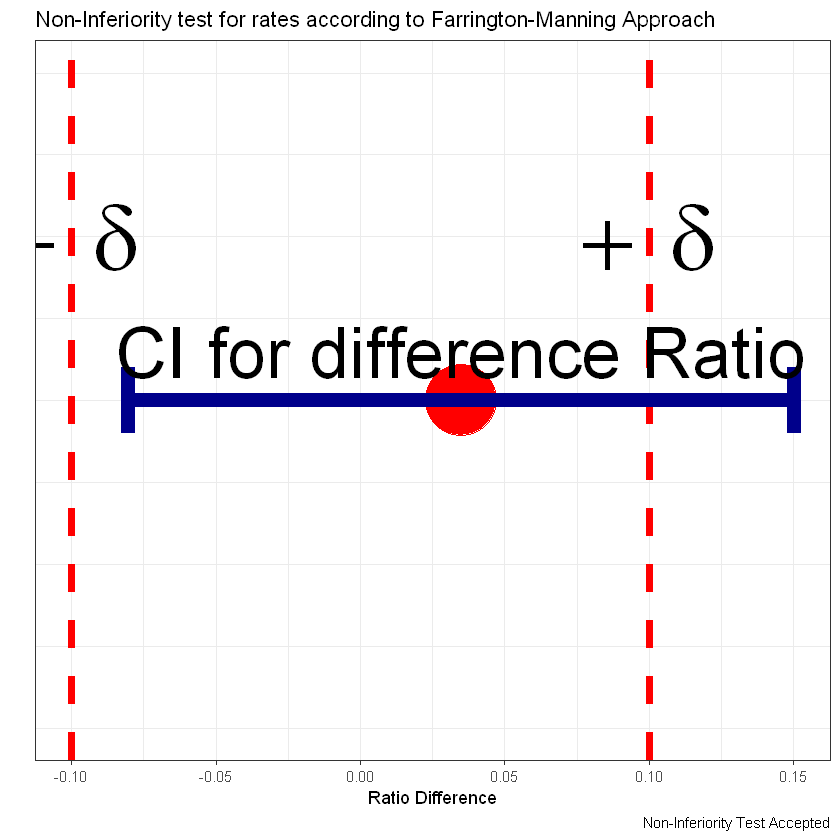

In [50]:
attributes(Ress)
Ress$TestResult
Ress$plotResult

In [52]:
#Ress$TableResult

<table class=" lightable-paper lightable-hover" style='font-family: "Arial Narrow", arial, helvetica, sans-serif; width: auto !important; margin-left: auto; margin-right: auto;border-bottom: 0;'>
<caption>Non-Inferiority test for rates according to Farrington-Manning Approach</caption>
<tbody>
  <tr>
   <td style="text-align:left;width: 15em; font-weight: bold;font-style: italic;color: white !important;background-color: green !important;"> p group1 </td>
   <td style="text-align:left;font-weight: bold;"> 0.9298 </td>
  </tr>
  <tr>
   <td style="text-align:left;width: 15em; font-weight: bold;font-style: italic;color: white !important;background-color: green !important;"> n group1 </td>
   <td style="text-align:left;font-weight: bold;"> 57 </td>
  </tr>
  <tr>
   <td style="text-align:left;width: 15em; font-weight: bold;font-style: italic;color: white !important;background-color: green !important;"> p group2 </td>
   <td style="text-align:left;font-weight: bold;"> 0.8947 </td>
  </tr>
  <tr>
   <td style="text-align:left;width: 15em; font-weight: bold;font-style: italic;color: white !important;background-color: green !important;"> n group2 </td>
   <td style="text-align:left;font-weight: bold;"> 57 </td>
  </tr>
  <tr>
   <td style="text-align:left;width: 15em; font-weight: bold;font-style: italic;color: white !important;background-color: green !important;"> rate difference (group1 - group2) </td>
   <td style="text-align:left;font-weight: bold;"> 0.0351 </td>
  </tr>
  <tr>
   <td style="text-align:left;width: 15em; font-weight: bold;font-style: italic;color: white !important;background-color: green !important;"> Z-Statistic </td>
   <td style="text-align:left;font-weight: bold;"> 2.2965 </td>
  </tr>
  <tr>
   <td style="text-align:left;width: 15em; font-weight: bold;font-style: italic;color: white !important;background-color: green !important;"> p-value </td>
   <td style="text-align:left;font-weight: bold;"> <span style="     color: yellow !important;border-radius: 4px; padding-right: 4px; padding-left: 4px; background-color: red !important;">0.0108</span> </td>
  </tr>
  <tr grouplength="2"><td colspan="2" style="border-top: 3px solid;color: #d48a00 !important;"><em><strong>Confidence Interval; Level is 95.0 %</strong></em></td></tr>
<tr>
   <td style="text-align:left;width: 15em; font-weight: bold;font-style: italic;color: white !important;background-color: green !important;padding-left: 2em;" indentlevel="1"> CI-LowerBond </td>
   <td style="text-align:left;font-weight: bold;"> -0.0802 </td>
  </tr>
  <tr>
   <td style="text-align:left;width: 15em; font-weight: bold;font-style: italic;color: white !important;background-color: green !important;padding-left: 2em;" indentlevel="1"> CI-UpperBond </td>
   <td style="text-align:left;font-weight: bold;"> 0.1504 </td>
  </tr>
</tbody>
<tfoot>
<tr><td style="padding: 0; " colspan="100%"><span style="font-style: italic;">Note: </span></td></tr>
<tr><td style="padding: 0; " colspan="100%">
<sup></sup> if cell of p-value is red, means that: p-value &lt; alpha</td></tr>
<tr><td style="padding: 0; " colspan="100%">
<sup>1</sup> based on p-value = 0.0108, therefore Non-Inferiority Test Accepted, alpha = 0.050</td></tr>
<tr><td style="padding: 0; " colspan="100%">
<sup>2</sup> Confidence Interval is 95.0 %</td></tr>
</tfoot>
</table>

<br><br>
$$
\text{R: Example V}
$$

In [61]:
head(rct_binary_data_3)
g1 <- rep(c(TRUE, FALSE), c(20, 11))
g2 <- rep(c(T, F), c(15, 9))
ddat <- data.frame(values = c(g1, g2), group = rep(c("method_1", "method_2"), c(length(g1), length(g2))))

,method_treat,state_life,count
,<chr>,<int>,<int>
1,method_1,1,20
2,method_1,0,11
3,method_2,1,15
4,method_2,0,9


In [62]:

Inferiority_superiority_test_pa(dataType = "binary", Dat = ddat, margin = .05, Method_estimate_for_binary_data = "wald", 
Name_groups = c("method_1", "method_2")) -> Ress

$names
[1] "TestResult"  "TableResult" "plotResult"


	Non-Inferiority test for rates according to wald Approach

data:  group 1: method_1, group 2: method_2
Z-statistic = 0.53575, p-value = 0.2961
alternative hypothesis: true rate difference (group 1 - group 2) is greater than 0.05
95 percent confidence interval:
 -0.2365147  0.2768373
sample estimates:
rate Difference: (group1 - group2) 
                        0.02016129 


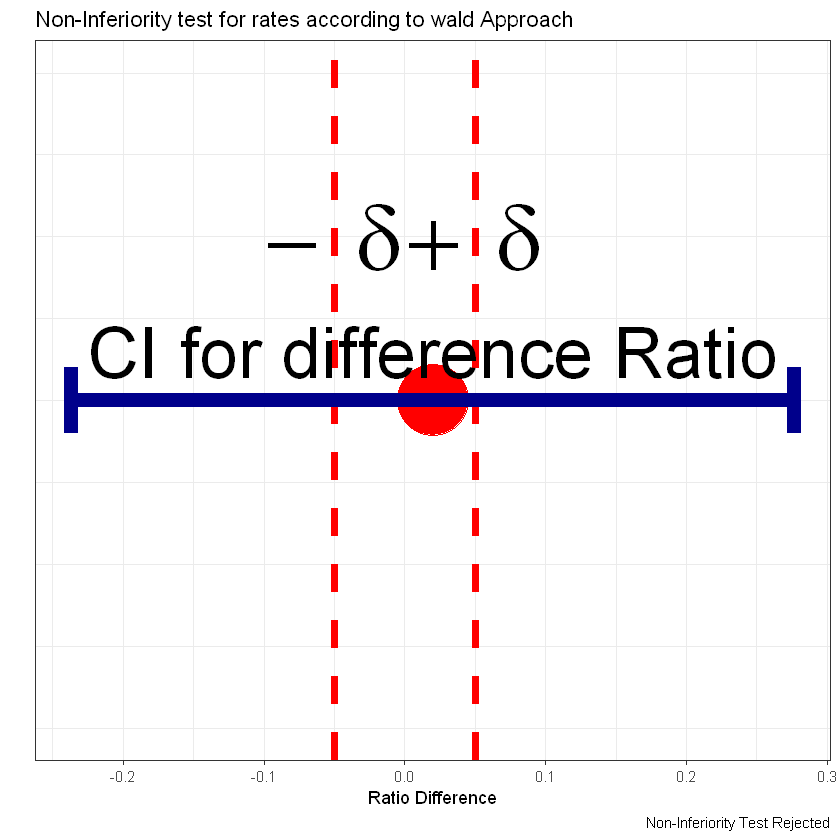

In [63]:
attributes(Ress)
Ress$TestResult
Ress$plotResult

In [10]:
#Ress$TableResult

<table class=" lightable-paper lightable-hover" style='font-family: "Arial Narrow", arial, helvetica, sans-serif; width: auto !important; margin-left: auto; margin-right: auto;border-bottom: 0;'>
<caption>Non-Inferiority test for rates according to wald Approach</caption>
<tbody>
  <tr>
   <td style="text-align:left;width: 15em; font-weight: bold;font-style: italic;color: white !important;background-color: green !important;"> p group1 </td>
   <td style="text-align:left;font-weight: bold;"> 0.6452 </td>
  </tr>
  <tr>
   <td style="text-align:left;width: 15em; font-weight: bold;font-style: italic;color: white !important;background-color: green !important;"> n group1 </td>
   <td style="text-align:left;font-weight: bold;"> 31 </td>
  </tr>
  <tr>
   <td style="text-align:left;width: 15em; font-weight: bold;font-style: italic;color: white !important;background-color: green !important;"> p group2 </td>
   <td style="text-align:left;font-weight: bold;"> 0.625 </td>
  </tr>
  <tr>
   <td style="text-align:left;width: 15em; font-weight: bold;font-style: italic;color: white !important;background-color: green !important;"> n group2 </td>
   <td style="text-align:left;font-weight: bold;"> 24 </td>
  </tr>
  <tr>
   <td style="text-align:left;width: 15em; font-weight: bold;font-style: italic;color: white !important;background-color: green !important;"> rate difference (group1 - group2) </td>
   <td style="text-align:left;font-weight: bold;"> 0.0202 </td>
  </tr>
  <tr>
   <td style="text-align:left;width: 15em; font-weight: bold;font-style: italic;color: white !important;background-color: green !important;"> Z-Statistic </td>
   <td style="text-align:left;font-weight: bold;"> 0.5357 </td>
  </tr>
  <tr>
   <td style="text-align:left;width: 15em; font-weight: bold;font-style: italic;color: white !important;background-color: green !important;"> p-value </td>
   <td style="text-align:left;font-weight: bold;"> <span style="     color: black !important;border-radius: 4px; padding-right: 4px; padding-left: 4px; background-color: white !important;">0.2961</span> </td>
  </tr>
  <tr grouplength="2"><td colspan="2" style="border-top: 3px solid;color: #d48a00 !important;"><em><strong>Confidence Interval; Level is 95.0 %</strong></em></td></tr>
<tr>
   <td style="text-align:left;width: 15em; font-weight: bold;font-style: italic;color: white !important;background-color: green !important;padding-left: 2em;" indentlevel="1"> CI-LowerBond </td>
   <td style="text-align:left;font-weight: bold;"> -0.2365 </td>
  </tr>
  <tr>
   <td style="text-align:left;width: 15em; font-weight: bold;font-style: italic;color: white !important;background-color: green !important;padding-left: 2em;" indentlevel="1"> CI-UpperBond </td>
   <td style="text-align:left;font-weight: bold;"> 0.2768 </td>
  </tr>
</tbody>
<tfoot>
<tr><td style="padding: 0; " colspan="100%"><span style="font-style: italic;">Note: </span></td></tr>
<tr><td style="padding: 0; " colspan="100%">
<sup></sup> if cell of p-value is red, means that: p-value &lt; alpha</td></tr>
<tr><td style="padding: 0; " colspan="100%">
<sup>1</sup> based on p-value = 0.2961, therefore Non-Inferiority Test Rejected, alpha = 0.050</td></tr>
<tr><td style="padding: 0; " colspan="100%">
<sup>2</sup> Confidence Interval is 95.0 %</td></tr>
</tfoot>
</table>